In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/Alphabets_data.csv')
df

letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  \
0          T     2     8      3       5      1     8    13      0      6   
1          I     5    12      3       7      2    10     5      5      4   
2          D     4    11      6       8      6    10     6      2      6   
3          N     7    11      6       6      3     5     9      4      6   
4          G     2     1      3       1      1     8     6      6      6   
...      ...   ...   ...    ...     ...    ...   ...   ...    ...    ...   
19995      D     2     2      3       3      2     7     7      7      6   
19996      C     7    10      8       8      4     4     8      6      9   
19997      T     6     9      6       7      5     6    11      3      7   
19998      S     2     3      4       2      1     8     7      2      6   
19999      A     4     9      6       6      2     9     5      3      1   

       xybar  x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0          6      10       8      0       8      0       8  
1         13       3       9      2       8      4      10  
2         10       3       7      3       7      3       9  
3          4       4      10      6      10      2       8  
4          6       5       9      1       7      5      10  
...      ...     ...     ...    ...     ...    ...     ...  
19995      6       6       4      2       8      3       7  
19996     12       9      13      2       9      3       7  
19997     11       9       5      2      12      2       4  
19998     10       6       8      1       9      5       8  
19999      8       1       8      2       7      2       8  

[20000 rows x 17 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [5]:
df.columns

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')

In [6]:
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [7]:
!pip install keras-tuner

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras_tuner import Hyperband
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



In [9]:
# Identifying categorical columns
categorical_columns = df.select_dtypes(include=object) # Changed np.object to object
categorical_columns
print(categorical_columns)

      letter
0          T
1          I
2          D
3          N
4          G
...      ...
19995      D
19996      C
19997      T
19998      S
19999      A

[20000 rows x 1 columns]


In [10]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    print(df[col])


0        19
1         8
2         3
3        13
4         6
         ..
19995     3
19996     2
19997    19
19998    18
19999     0
Name: letter, Length: 20000, dtype: int64


In [11]:
# Encode target variable
label_encoder = LabelEncoder()
df['letter'] = label_encoder.fit_transform(df['letter'])
df['letter']

0        19
1         8
2         3
3        13
4         6
         ..
19995     3
19996     2
19997    19
19998    18
19999     0
Name: letter, Length: 20000, dtype: int64

In [12]:
#visulazation
df.corr()


letter      xbox      ybox     width    height     onpix      xbar  \
letter  1.000000  0.105349  0.001547  0.096817  0.041672 -0.002665 -0.049637   
xbox    0.105349  1.000000  0.757793  0.851514  0.672764  0.619097 -0.032595   
ybox    0.001547  0.757793  1.000000  0.671912  0.823207  0.555067  0.045690   
width   0.096817  0.851514  0.671912  1.000000  0.660215  0.765716  0.061959   
height  0.041672  0.672764  0.823207  0.660215  1.000000  0.644366  0.042844   
onpix  -0.002665  0.619097  0.555067  0.765716  0.644366  1.000000  0.139159   
xbar   -0.049637 -0.032595  0.045690  0.061959  0.042844  0.139159  1.000000   
ybar    0.308919  0.045545 -0.040925  0.024832 -0.020072 -0.028822 -0.356580   
x2bar  -0.109954  0.014306 -0.025019 -0.098611  0.082383 -0.011985 -0.053306   
y2bar   0.012275  0.052086  0.096478  0.057074  0.059032 -0.065557 -0.122851   
xybar  -0.077303  0.148056  0.159954  0.115018  0.012458 -0.069776  0.085963   
x2ybar  0.389421  0.035464 -0.054648  0.011694 -0.011991 -0.072941 -0.341957   
xy2bar -0.140922 -0.046333 -0.007568 -0.045009  0.026386 -0.038858 -0.032115   
xedge   0.095885  0.489155  0.274431  0.557251  0.265243  0.627507  0.144325   
xedgey  0.336885  0.098180 -0.001336  0.045658  0.025359  0.017649 -0.253339   
yedge  -0.056578  0.273504  0.230883  0.260285  0.297545  0.492653  0.127056   
yedgex -0.183466 -0.105147 -0.042741 -0.118273 -0.018853 -0.062969  0.248816   

            ybar     x2bar     y2bar     xybar    x2ybar    xy2bar     xedge  \
letter  0.308919 -0.109954  0.012275 -0.077303  0.389421 -0.140922  0.095885   
xbox    0.045545  0.014306  0.052086  0.148056  0.035464 -0.046333  0.489155   
ybox   -0.040925 -0.025019  0.096478  0.159954 -0.054648 -0.007568  0.274431   
width   0.024832 -0.098611  0.057074  0.115018  0.011694 -0.045009  0.557251   
height -0.020072  0.082383  0.059032  0.012458 -0.011991  0.026386  0.265243   
onpix  -0.028822 -0.011985 -0.065557 -0.069776 -0.072941 -0.038858  0.627507   
xbar   -0.356580 -0.053306 -0.122851  0.085963 -0.341957 -0.032115  0.144325   
ybar    1.000000 -0.118625 -0.049658  0.178318  0.600397 -0.271649 -0.036722   
x2bar  -0.118625  1.000000 -0.188431 -0.317780  0.042545  0.082020  0.142132   
y2bar  -0.049658 -0.188431  1.000000  0.132000 -0.060116  0.119048 -0.384018   
xybar   0.178318 -0.317780  0.132000  1.000000  0.057988 -0.106759 -0.175676   
x2ybar  0.600397  0.042545 -0.060116  0.057988  1.000000  0.063214  0.053566   
xy2bar -0.271649  0.082020  0.119048 -0.106759  0.063214  1.000000 -0.008753   
xedge  -0.036722  0.142132 -0.384018 -0.175676  0.053566 -0.008753  1.000000   
xedgey  0.555060 -0.084820 -0.052545  0.029419  0.527239 -0.184927  0.002849   
yedge  -0.078008  0.006546  0.277540 -0.087019 -0.226251  0.049695  0.108411   
yedgex -0.207900  0.182902 -0.061335 -0.114223 -0.236518  0.245808 -0.049789   

          xedgey     yedge    yedgex  
letter  0.336885 -0.056578 -0.183466  
xbox    0.098180  0.273504 -0.105147  
ybox   -0.001336  0.230883 -0.042741  
width   0.045658  0.260285 -0.118273  
height  0.025359  0.297545 -0.018853  
onpix   0.017649  0.492653 -0.062969  
xbar   -0.253339  0.127056  0.248816  
ybar    0.555060 -0.078008 -0.207900  
x2bar  -0.084820  0.006546  0.182902  
y2bar  -0.052545  0.277540 -0.061335  
xybar   0.029419 -0.087019 -0.114223  
x2ybar  0.527239 -0.226251 -0.236518  
xy2bar -0.184927  0.049695  0.245808  
xedge   0.002849  0.108411 -0.049789  
xedgey  1.000000 -0.064402 -0.187591  
yedge  -0.064402  1.000000  0.143588  
yedgex -0.187591  0.143588  1.000000

In [13]:
df.corr().style.background_gradient(cmap='coolwarm')


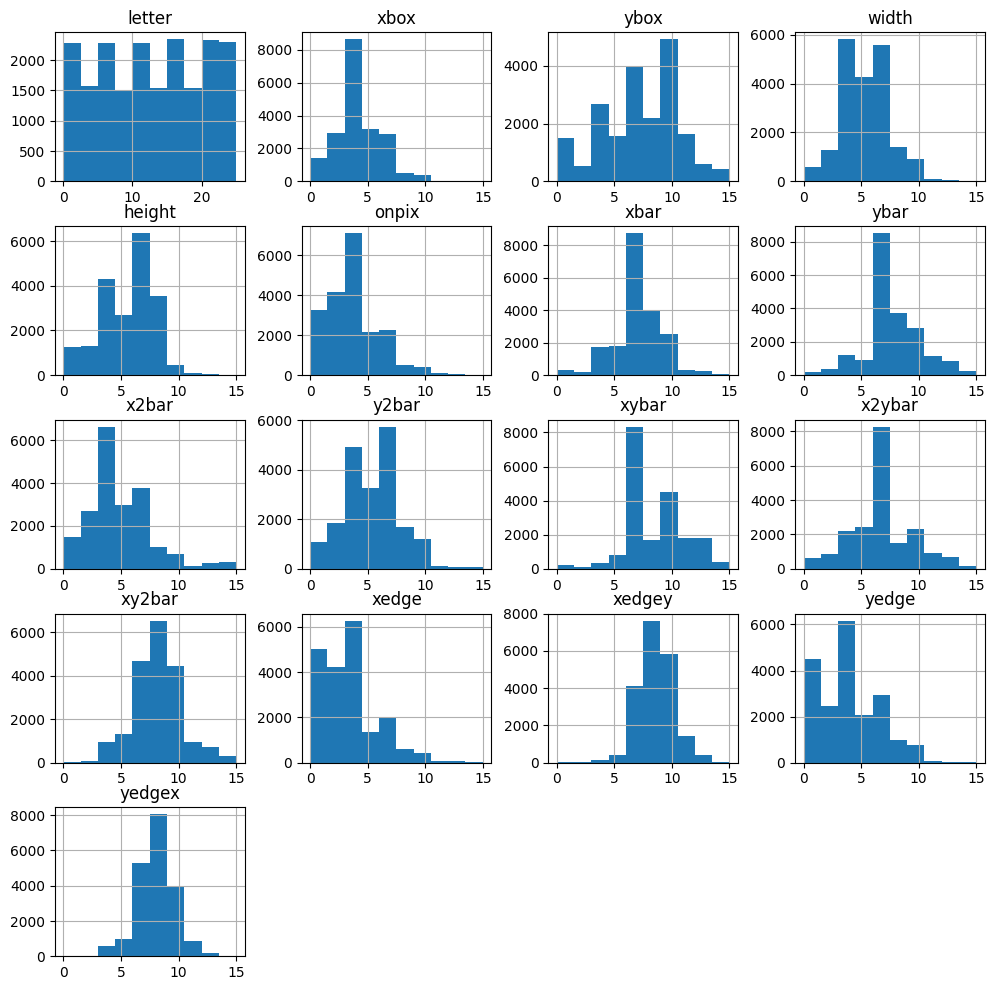

In [14]:
df.hist(figsize=(12,12))
plt.show()

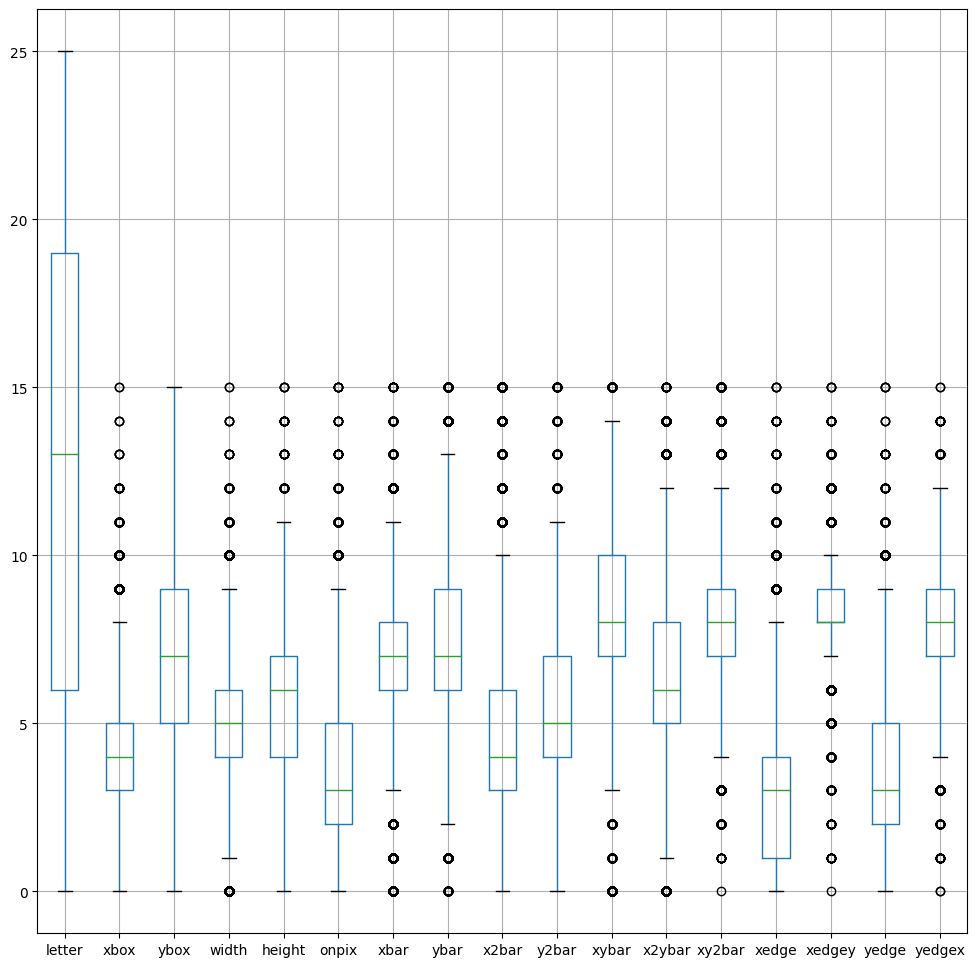

In [15]:
df.boxplot(figsize=(12,12))
plt.show()

In [16]:
#detect the outlier
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

letter    13.0
xbox       2.0
ybox       4.0
width      2.0
height     3.0
onpix      3.0
xbar       2.0
ybar       3.0
x2bar      3.0
y2bar      3.0
xybar      3.0
x2ybar     3.0
xy2bar     2.0
xedge      3.0
xedgey     1.0
yedge      3.0
yedgex     2.0
dtype: float64


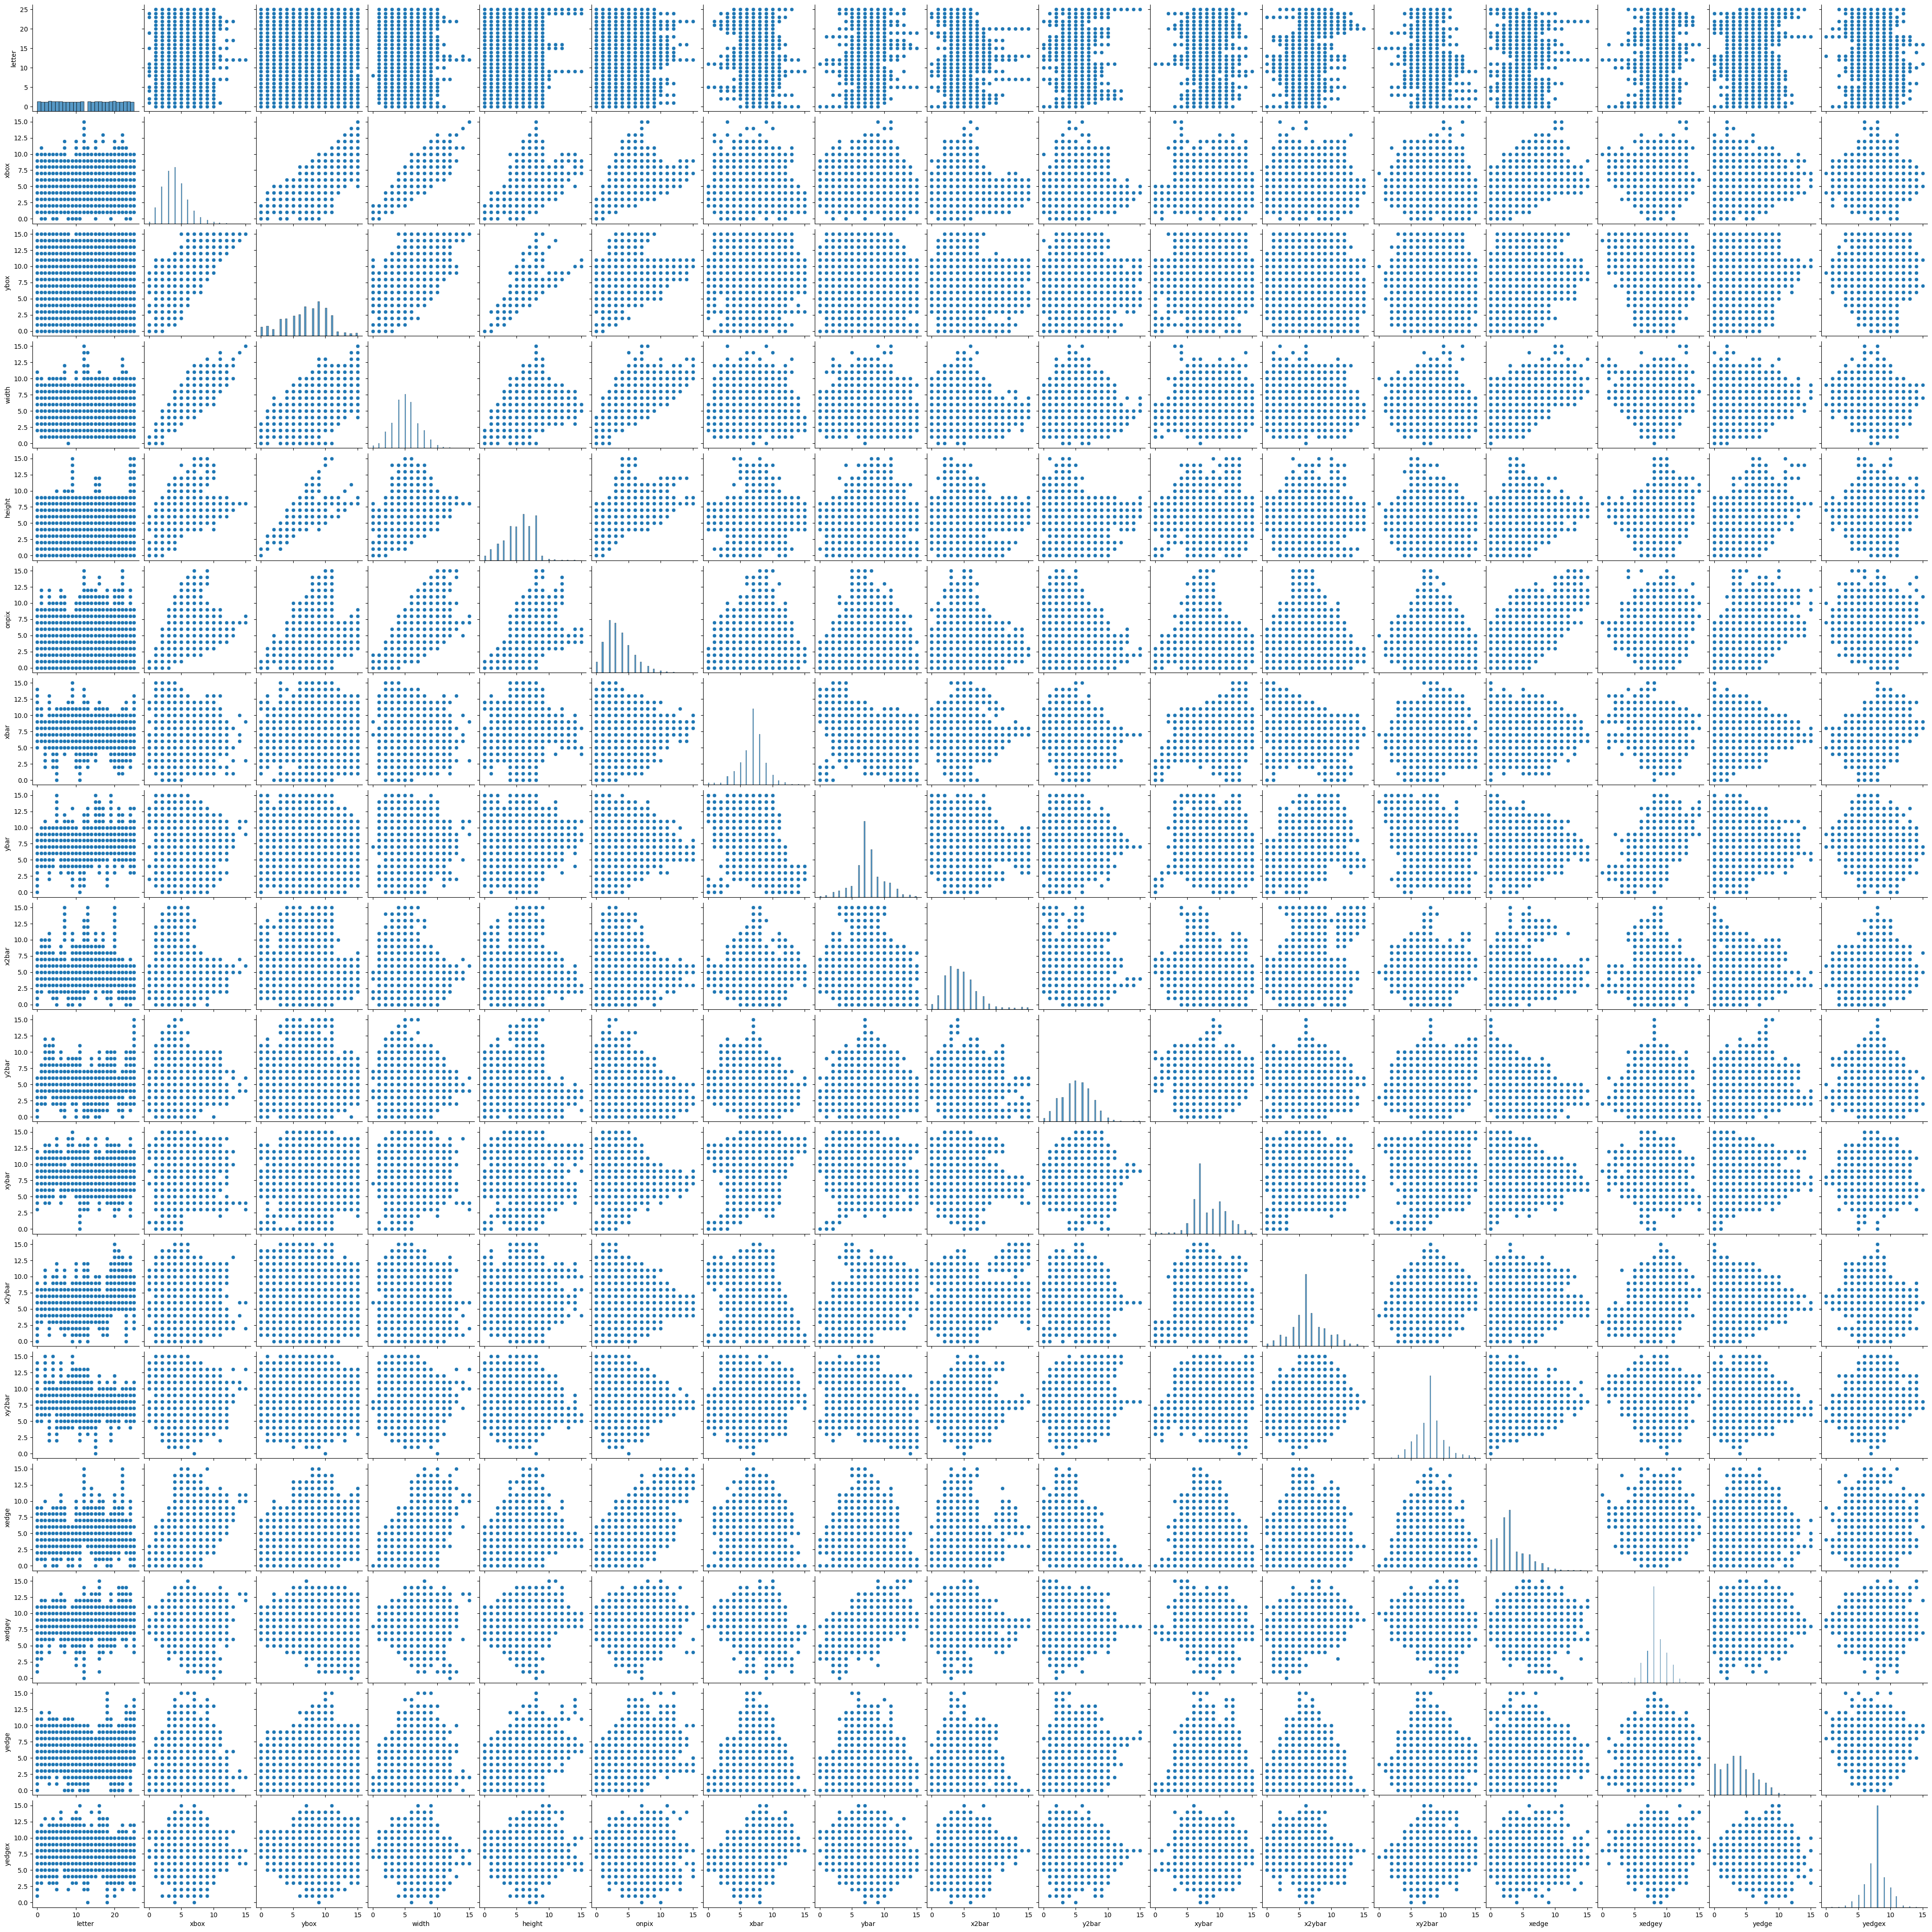

In [17]:
sns.pairplot(df)

<ipython-input-18-9b96543c7ebd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['letter'])


<Axes: xlabel='letter', ylabel='Density'>

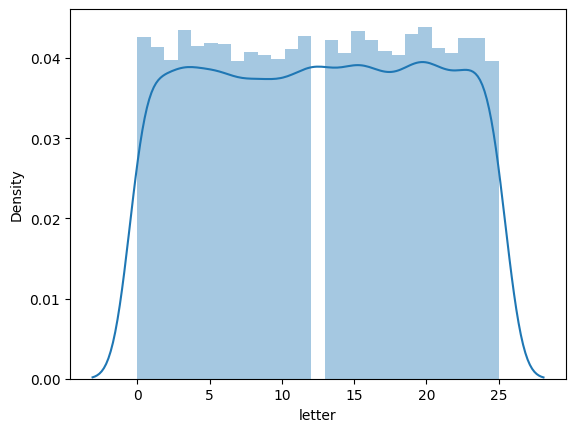

In [18]:
sns.distplot(df['letter'])


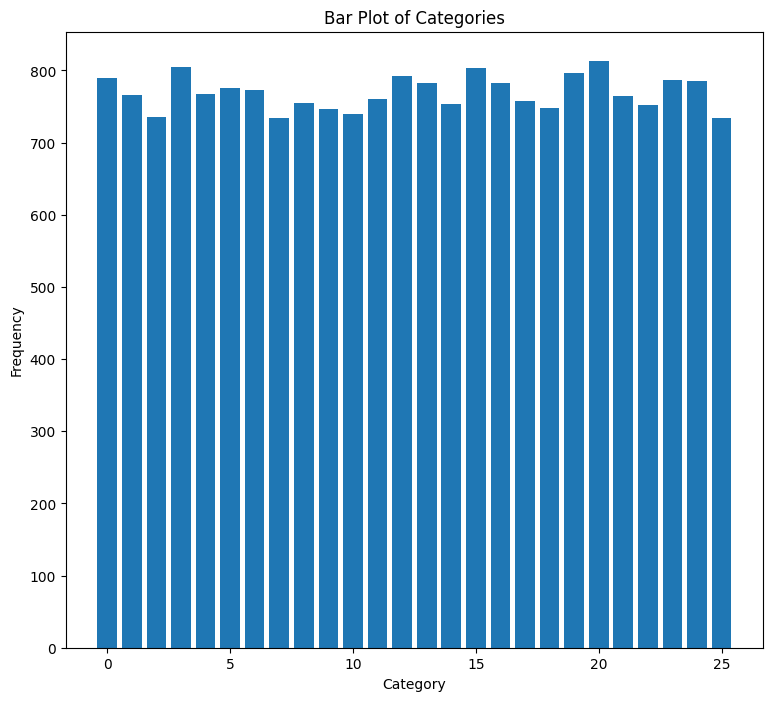

In [19]:
#barplot
plt.figure(figsize=(9,8))
plt.ticklabel_format(style='plain', axis='x')
# Assuming 'letter' is a column in your DataFrame representing categories
# and you want to count the frequency of each category
category_counts = df['letter'].value_counts()

# Plotting the bar chart
plt.bar(category_counts.index, category_counts.values)
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.title("Bar Plot of Categories")

plt.show()

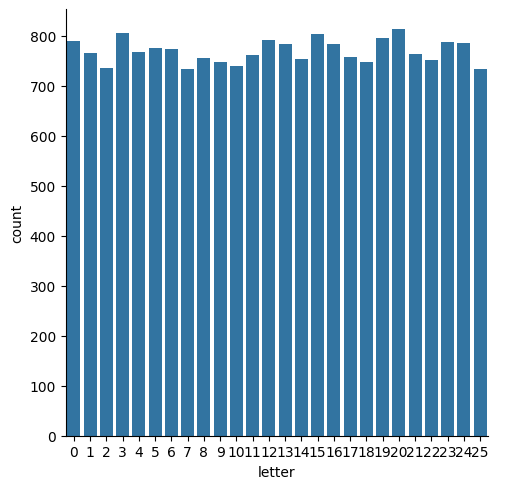

In [20]:
sns.catplot(x='letter',data=df,kind='count')


In [21]:
sns.distplot(df['xbox'])


<ipython-input-21-c6cfc621b25b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['xbox'])


<Axes: xlabel='xbox', ylabel='Density'>

<ipython-input-22-68fb83d9d45c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ybox'])


<Axes: xlabel='ybox', ylabel='Density'>

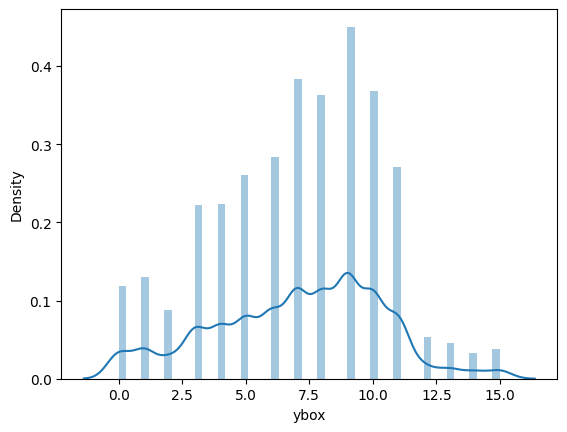

In [22]:
sns.distplot(df['ybox'])

<ipython-input-23-9552b6b0bdad>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['width'])


<Axes: xlabel='width', ylabel='Density'>

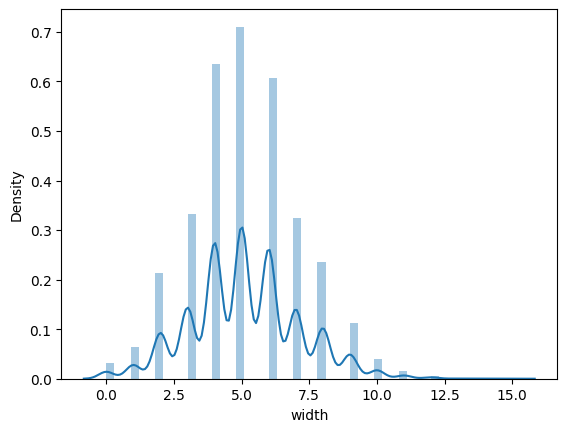

In [23]:
sns.distplot(df['width'])

<ipython-input-24-e7e93867805e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['height'])


<Axes: xlabel='height', ylabel='Density'>

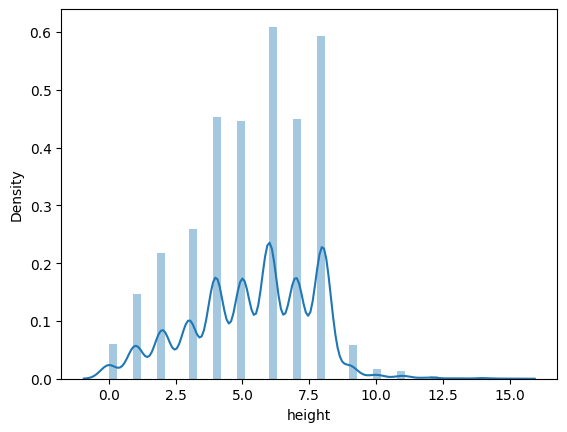

In [24]:
sns.distplot(df['height'])

In [25]:
sns.distplot(df['onpix'])

<ipython-input-25-7dfceb08d7d4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['onpix'])


<Axes: xlabel='onpix', ylabel='Density'>

<ipython-input-26-684afb22781f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['xbar'])


<Axes: xlabel='xbar', ylabel='Density'>

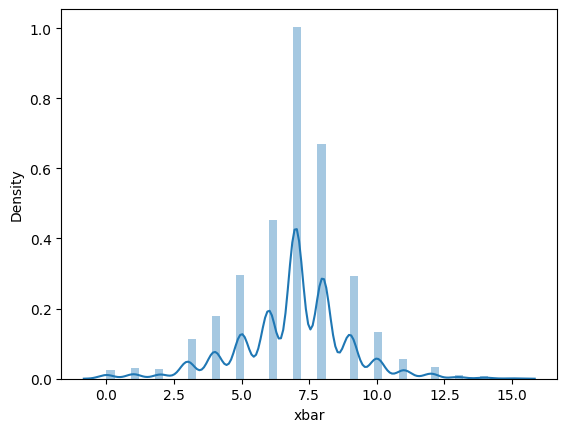

In [26]:
sns.distplot(df['xbar'])

In [27]:
sns.distplot(df['xybar'])

<ipython-input-27-3d02bb0cfd5c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['xybar'])


<Axes: xlabel='xybar', ylabel='Density'>

In [28]:
sns.distplot(df['x2bar'])

<ipython-input-28-095d780e65d6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['x2bar'])


<Axes: xlabel='x2bar', ylabel='Density'>

<Axes: >

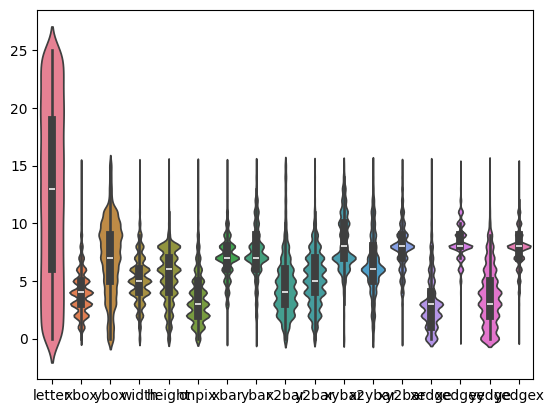

In [29]:
#violin plot
sns.violinplot(data=df)

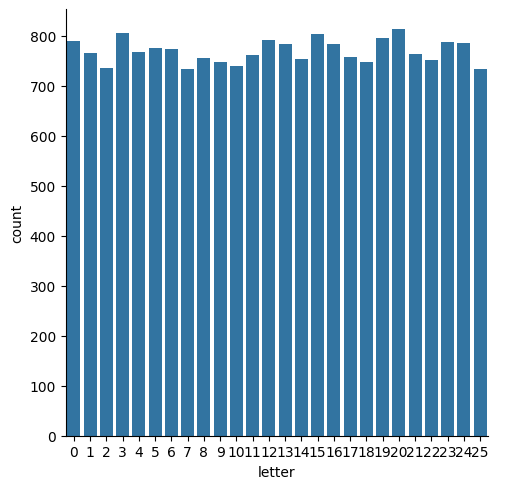

In [30]:
sns.catplot(x='letter',data=df,kind='count')

In [31]:
sns.clustermap(df)

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


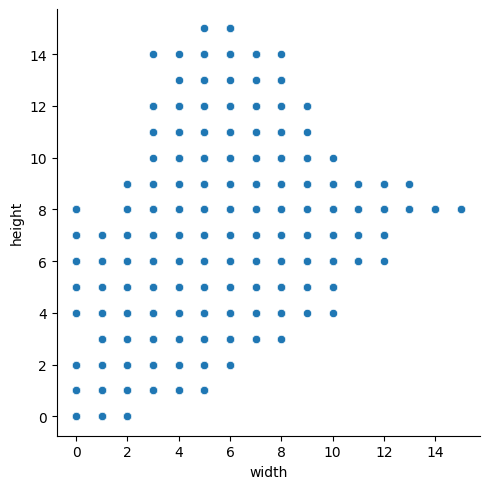

In [32]:
sns.relplot(x='width',y='height',data=df)

In [33]:
sns.relplot(x='width',y='height',hue='letter',data=df)

In [34]:
sns.relplot(x='width',y='height',col='letter',data=df)

<Axes: >

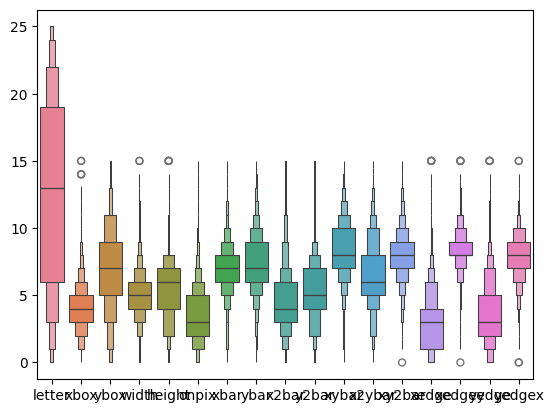

In [35]:
sns.boxenplot(data=df)

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

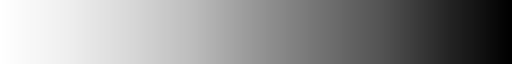

In [36]:
sns.choose_colorbrewer_palette('sequential', as_cmap=True)



interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

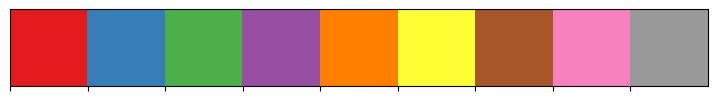

In [37]:
sns.choose_colorbrewer_palette('qualitative')


In [38]:
sns.choose_colorbrewer_palette('diverging')

interactive(children=(Dropdown(description='name', options=('RdBu', 'RdGy', 'PRGn', 'PiYG', 'BrBG', 'RdYlBu', …

[(0.6922722029988466, 0.09227220299884659, 0.1677047289504037),
 (0.8392156862745098, 0.3764705882352941, 0.30196078431372547),
 (0.954555940023068, 0.641753171856978, 0.5057285659361782),
 (0.9921568627450981, 0.8588235294117647, 0.7803921568627451),
 (0.9657054978854287, 0.9672433679354094, 0.9680891964628989),
 (0.8196078431372551, 0.8980392156862746, 0.9411764705882353),
 (0.5664744329104193, 0.7687043444828915, 0.8685121107266437),
 (0.2627450980392157, 0.5764705882352941, 0.7647058823529411),
 (0.12725874663590928, 0.3958477508650519, 0.6687427912341407)]

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


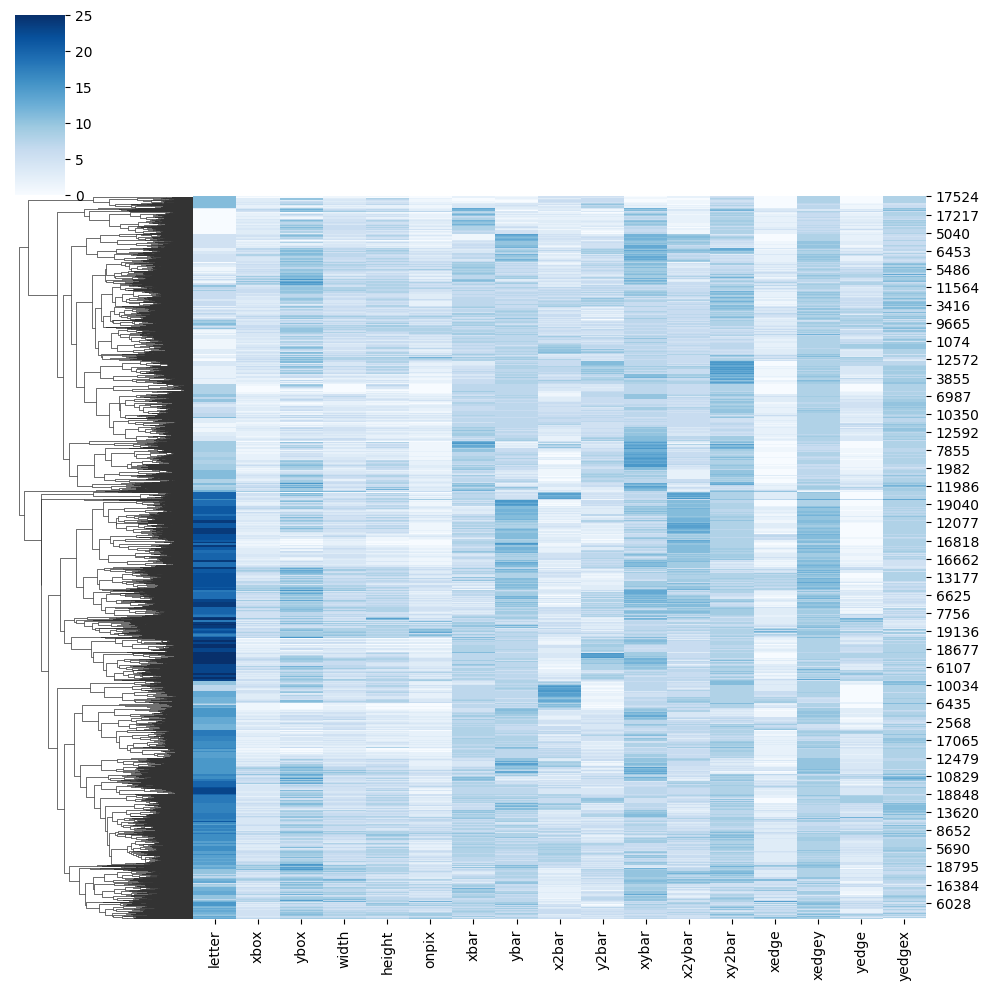

In [39]:
sns.clustermap(df, cmap="Blues", col_cluster=False)


<Axes: >

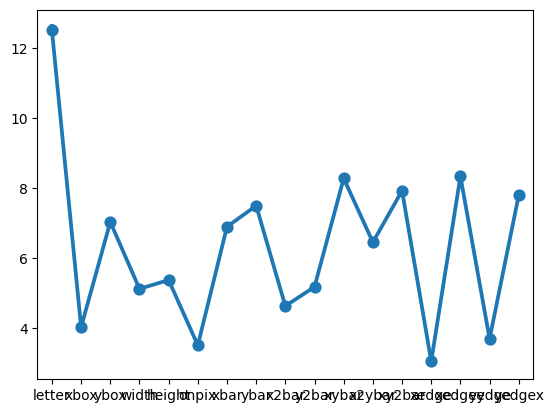

In [40]:
sns.pointplot(data=df)

<Axes: >

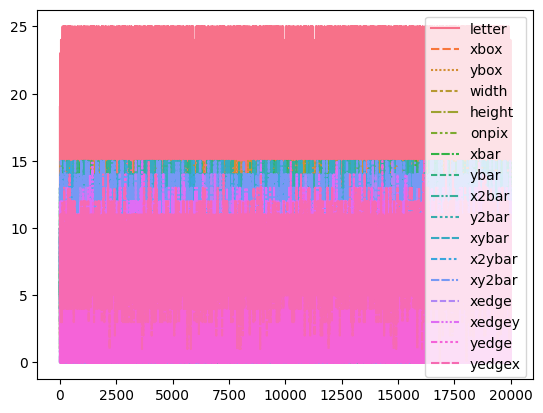

In [41]:
sns.lineplot(data=df)

In [42]:
sns.stripplot(data=df)

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


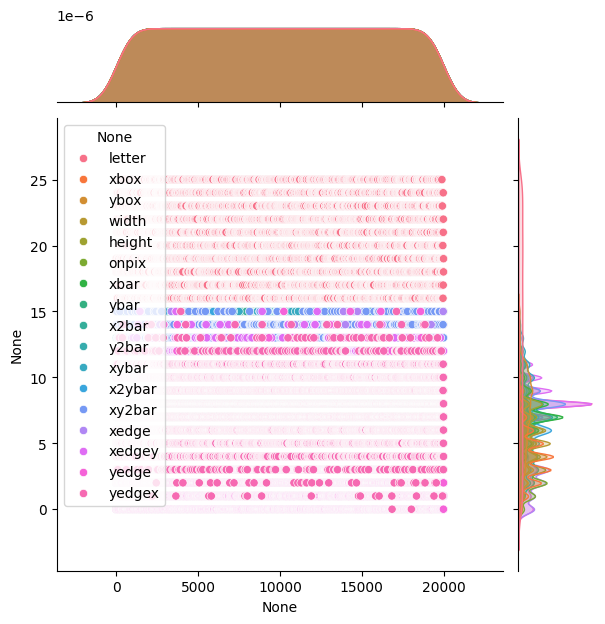

In [43]:
sns.jointplot(data=df)

<Axes: ylabel='Density'>

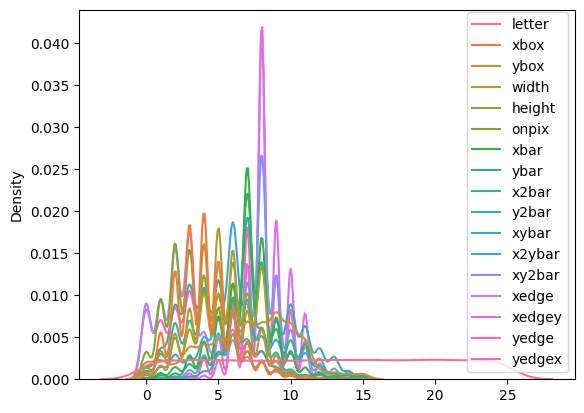

In [44]:
sns.kdeplot(data=df)

In [45]:
sns.lmplot(data=df,x='width',y='height')

In [46]:
# Split the dataset into features (X) and labels (y)
x = df.drop('letter', axis=1)
y = df['letter']


In [47]:
y

0        19
1         8
2         3
3        13
4         6
         ..
19995     3
19996     2
19997    19
19998    18
19999     0
Name: letter, Length: 20000, dtype: int64

In [48]:
x

xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
0         2     8      3       5      1     8    13      0      6      6   
1         5    12      3       7      2    10     5      5      4     13   
2         4    11      6       8      6    10     6      2      6     10   
3         7    11      6       6      3     5     9      4      6      4   
4         2     1      3       1      1     8     6      6      6      6   
...     ...   ...    ...     ...    ...   ...   ...    ...    ...    ...   
19995     2     2      3       3      2     7     7      7      6      6   
19996     7    10      8       8      4     4     8      6      9     12   
19997     6     9      6       7      5     6    11      3      7     11   
19998     2     3      4       2      1     8     7      2      6     10   
19999     4     9      6       6      2     9     5      3      1      8   

       x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0          10       8      0       8      0       8  
1           3       9      2       8      4      10  
2           3       7      3       7      3       9  
3           4      10      6      10      2       8  
4           5       9      1       7      5      10  
...       ...     ...    ...     ...    ...     ...  
19995       6       4      2       8      3       7  
19996       9      13      2       9      3       7  
19997       9       5      2      12      2       4  
19998       6       8      1       9      5       8  
19999       1       8      2       7      2       8  

[20000 rows x 16 columns]

In [49]:
#train the test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((16000, 16), (4000, 16), (16000,), (4000,))

In [50]:
x_train.head()

xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
5894     4     7      5       5      4     6     7      3      7     11   
3728     4     7      6       5      5     6     8      3      7     11   
8958     3     5      4       3      3     7     8      5      5      7   
7671     4    10      6       7      6     5     7      5      7      6   
5999     4    10      6       8      4     8    11      2      3      4   

      x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
5894       8       9      3       8      4       8  
3728       8       9      3       8      4       7  
8958       7       6      5       9      2       6  
7671       6      12      3       8      6       9  
5999      10       9      3      11      1       8

In [51]:
#standard scaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
print(x_train)


[[-0.01291349 -0.01275171 -0.06013429 ... -0.21675086  0.12044468
   0.12215017]
 [-0.01291349 -0.01275171  0.43581861 ... -0.21675086  0.12044468
  -0.49633169]
 [-0.53599158 -0.618174   -0.55608718 ...  0.43123377 -0.65897489
  -1.11481354]
 ...
 [-0.53599158 -0.92088514  0.43581861 ... -0.86473548 -0.2692651
   0.74063202]
 [-0.53599158  0.28995944 -0.55608718 ... -0.21675086 -1.04868467
  -0.49633169]
 [-1.58214775 -1.22359629 -1.54799298 ... -0.86473548 -1.43839445
  -0.49633169]]


In [52]:
print(x_test)

[[-0.53599158 -0.31546285 -0.06013429 ... -0.86473548  1.28957403
  -1.11481354]
 [-0.01291349  1.19809287  0.43581861 ...  1.72720301  1.28957403
  -1.73329539]
 [-0.53599158 -0.92088514 -0.06013429 ... -1.5127201  -0.65897489
   0.12215017]
 ...
 [ 0.5101646   0.89538173  0.9317715  ... -0.21675086  0.12044468
   0.12215017]
 [-0.01291349 -0.618174   -0.06013429 ...  1.07921839  2.06899359
  -1.73329539]
 [-1.05906966 -0.618174   -0.55608718 ...  1.72720301 -0.65897489
   0.12215017]]


<ipython-input-53-00d6cd99ac9d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['width'])
<ipython-input-53-00d6cd99ac9d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['height'])


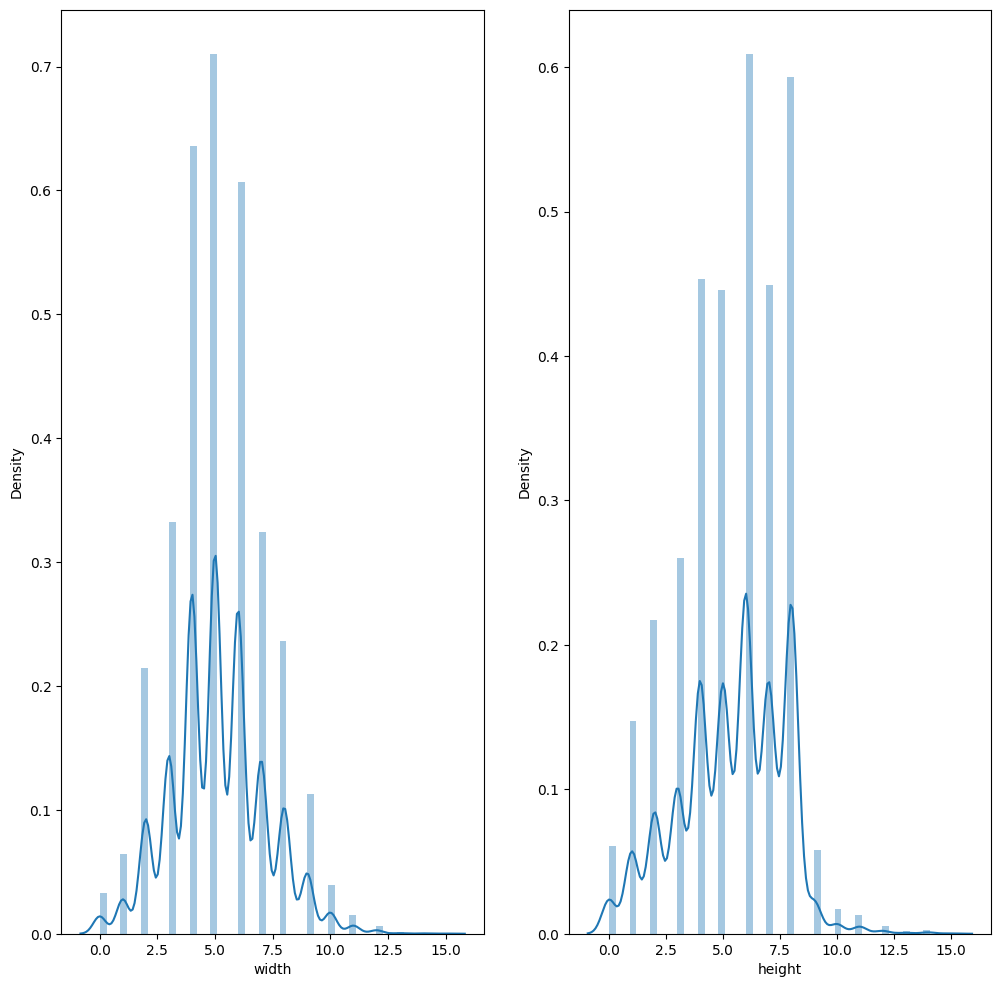

<ipython-input-53-00d6cd99ac9d>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['width'])
<ipython-input-53-00d6cd99ac9d>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)
<ipython-input-53-00d6cd99ac9d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use t

<ipython-input-53-00d6cd99ac9d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['width'])
<ipython-input-53-00d6cd99ac9d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['height'])


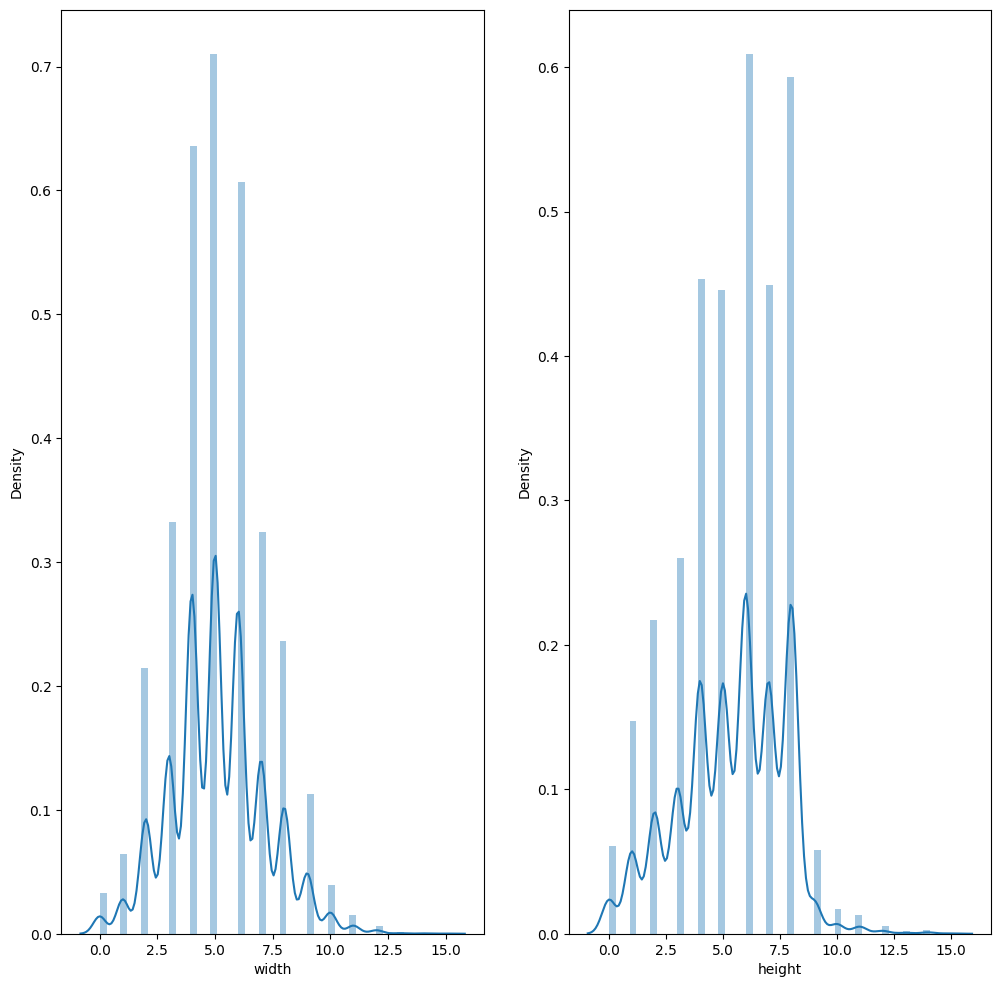

<ipython-input-53-00d6cd99ac9d>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['width'])
<ipython-input-53-00d6cd99ac9d>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)
<ipython-input-53-00d6cd99ac9d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use t

<ipython-input-53-00d6cd99ac9d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['width'])
<ipython-input-53-00d6cd99ac9d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['height'])


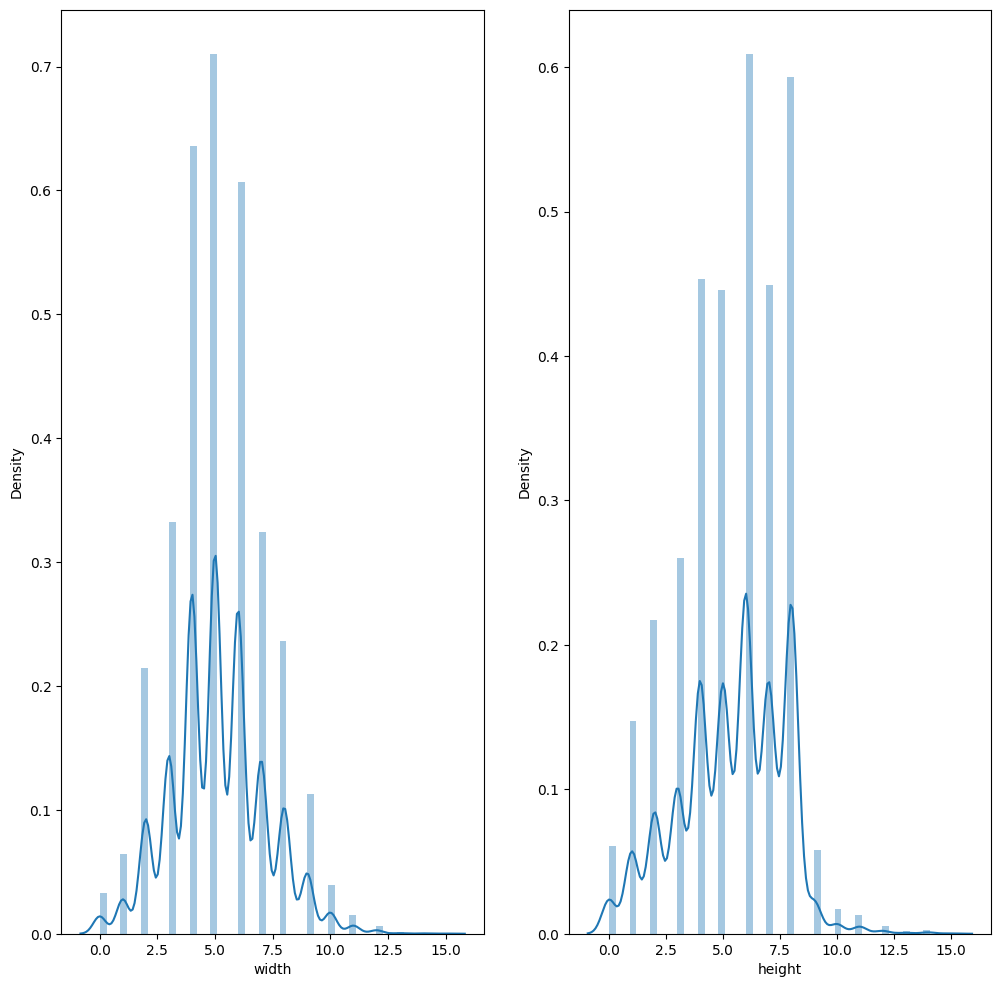

<ipython-input-53-00d6cd99ac9d>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['width'])
<ipython-input-53-00d6cd99ac9d>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)
<ipython-input-53-00d6cd99ac9d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use t

<ipython-input-53-00d6cd99ac9d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['width'])
<ipython-input-53-00d6cd99ac9d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['height'])


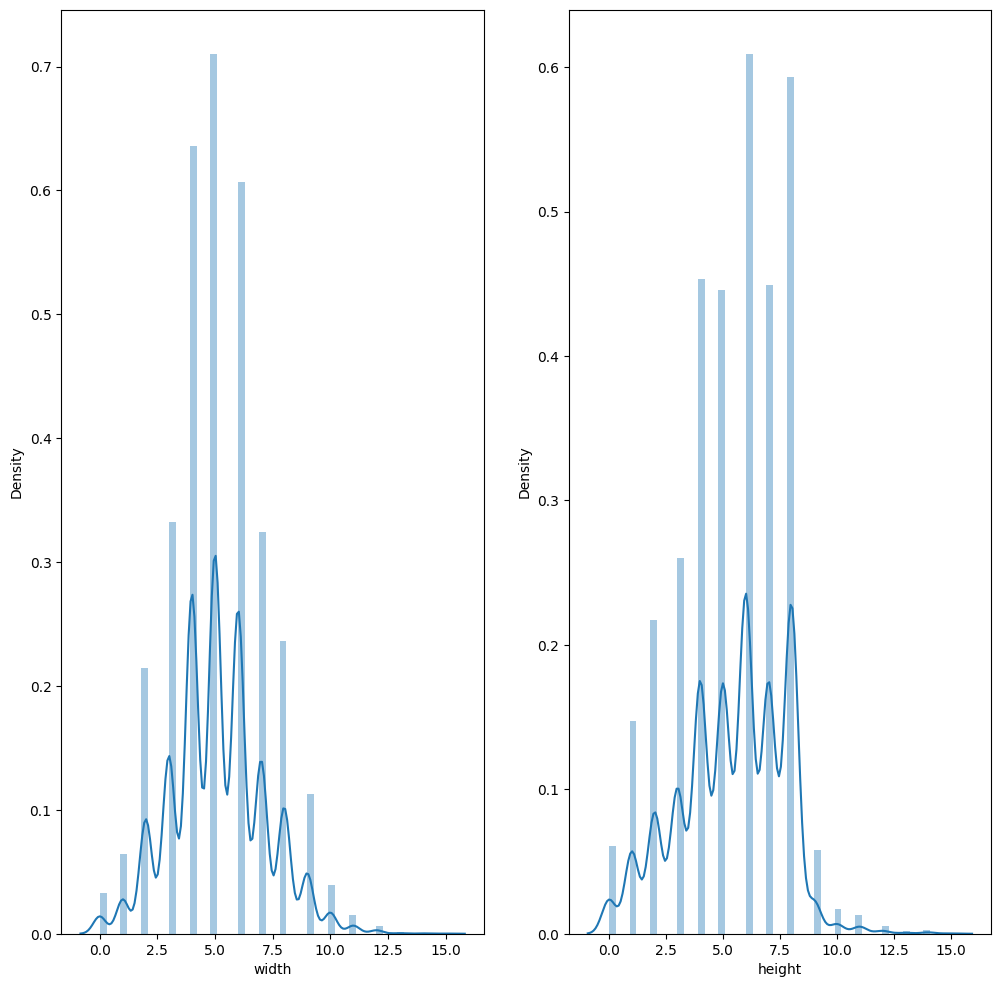

<ipython-input-53-00d6cd99ac9d>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['width'])
<ipython-input-53-00d6cd99ac9d>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)
<ipython-input-53-00d6cd99ac9d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use t

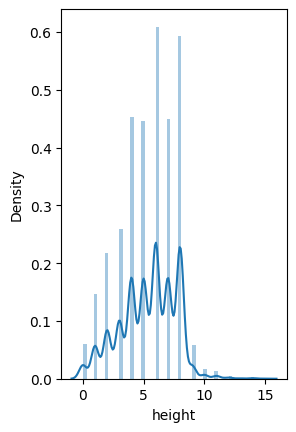

<ipython-input-53-00d6cd99ac9d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['width'])
<ipython-input-53-00d6cd99ac9d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['height'])


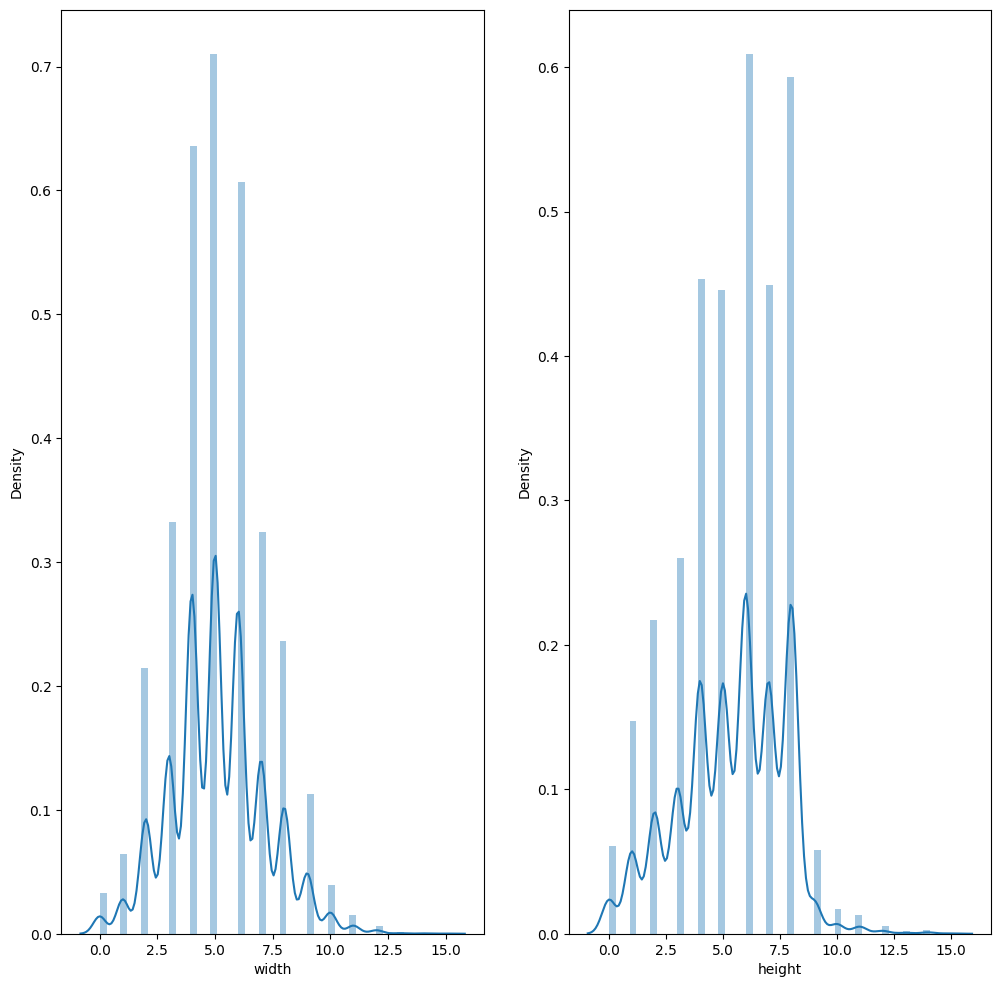

<ipython-input-53-00d6cd99ac9d>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['width'])
<ipython-input-53-00d6cd99ac9d>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)
<ipython-input-53-00d6cd99ac9d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use t

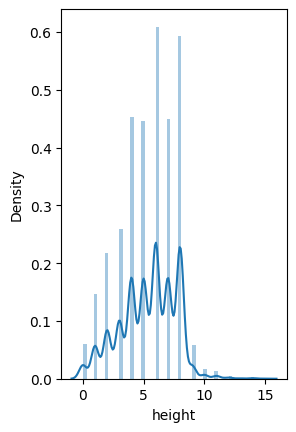

<ipython-input-53-00d6cd99ac9d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['width'])
<ipython-input-53-00d6cd99ac9d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['height'])


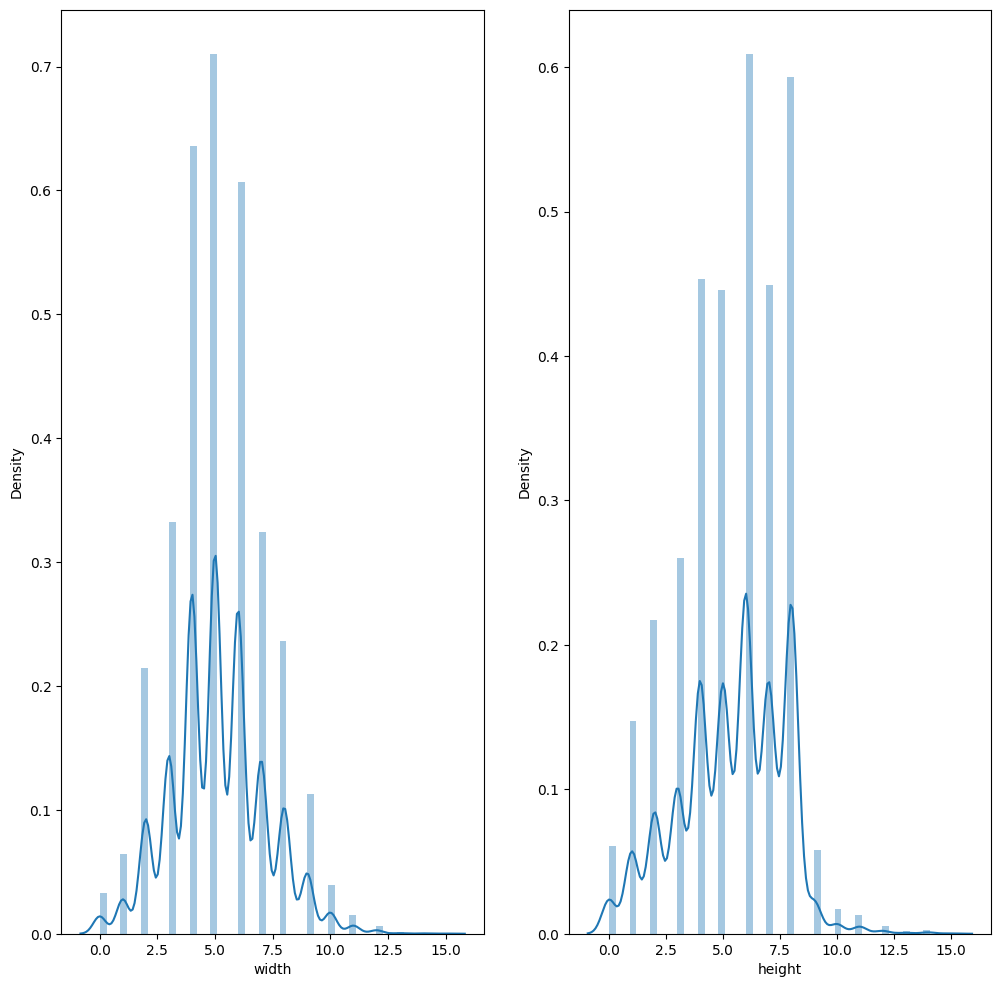

<ipython-input-53-00d6cd99ac9d>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['width'])
<ipython-input-53-00d6cd99ac9d>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)
<ipython-input-53-00d6cd99ac9d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use t

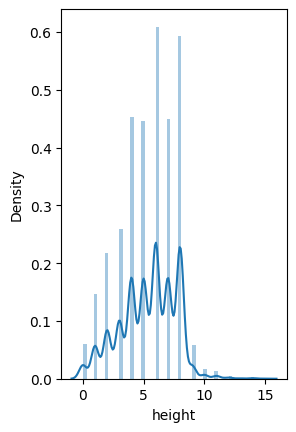

<ipython-input-53-00d6cd99ac9d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['width'])
<ipython-input-53-00d6cd99ac9d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['height'])


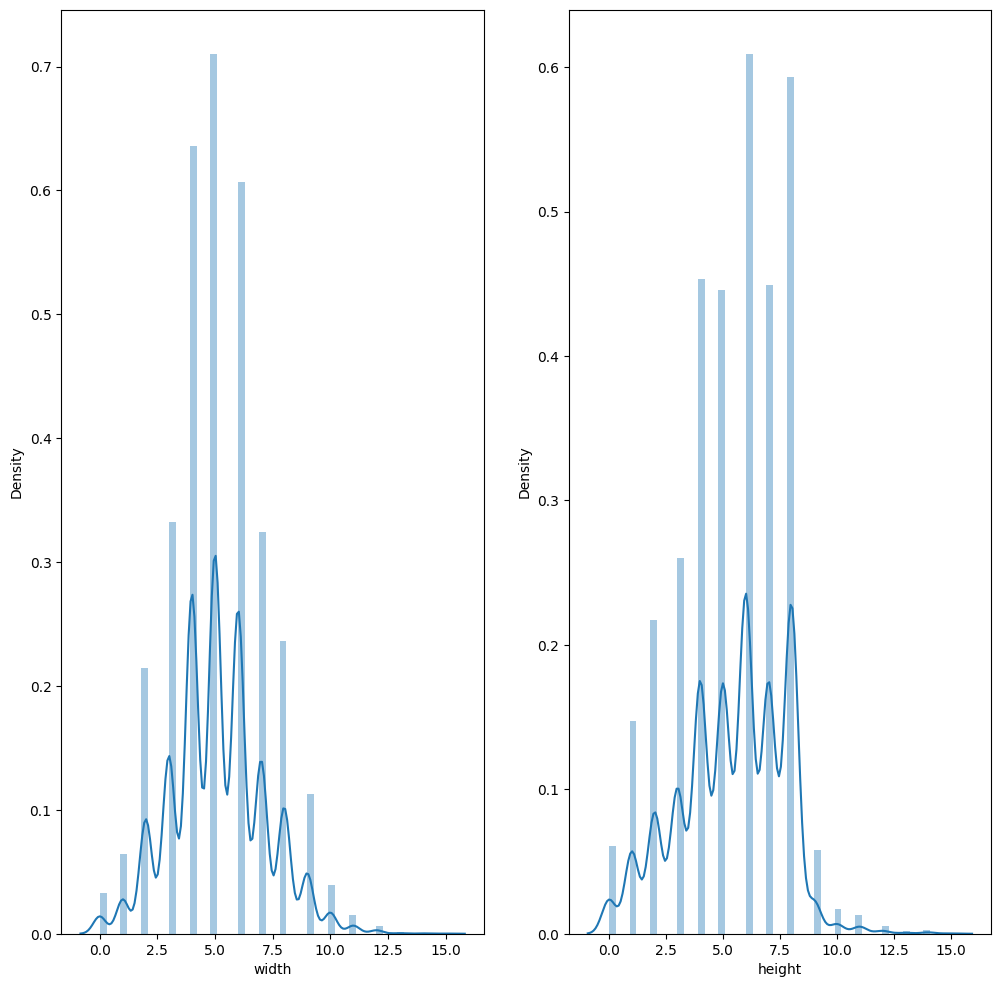

<ipython-input-53-00d6cd99ac9d>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['width'])
<ipython-input-53-00d6cd99ac9d>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)
<ipython-input-53-00d6cd99ac9d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use t

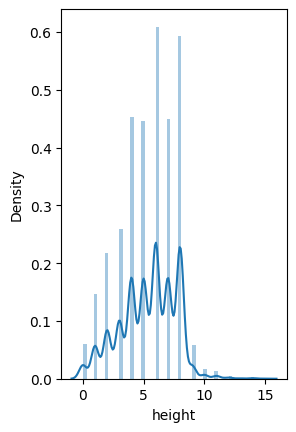

<ipython-input-53-00d6cd99ac9d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['width'])
<ipython-input-53-00d6cd99ac9d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['height'])


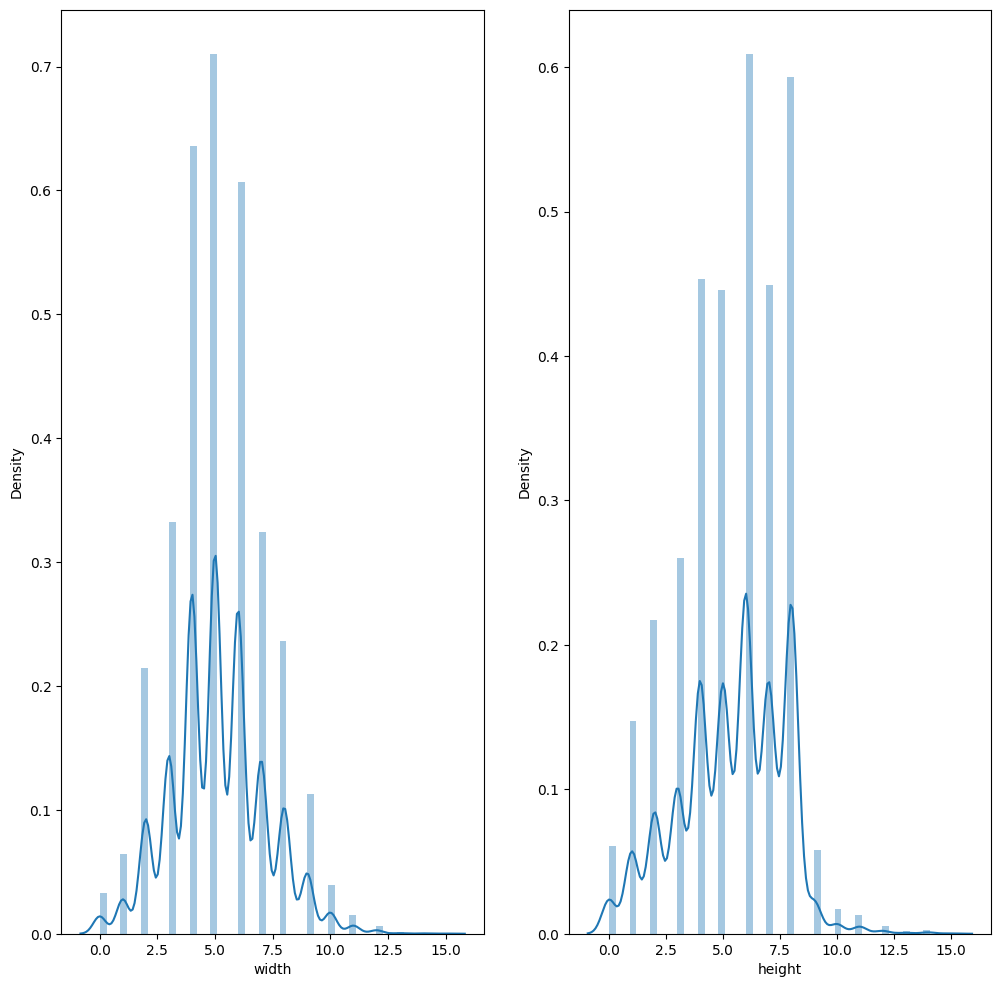

<ipython-input-53-00d6cd99ac9d>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['width'])
<ipython-input-53-00d6cd99ac9d>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)
<ipython-input-53-00d6cd99ac9d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use t

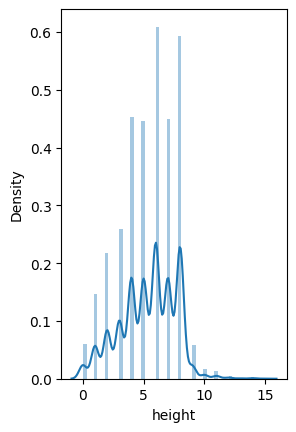

<ipython-input-53-00d6cd99ac9d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['width'])
<ipython-input-53-00d6cd99ac9d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['height'])


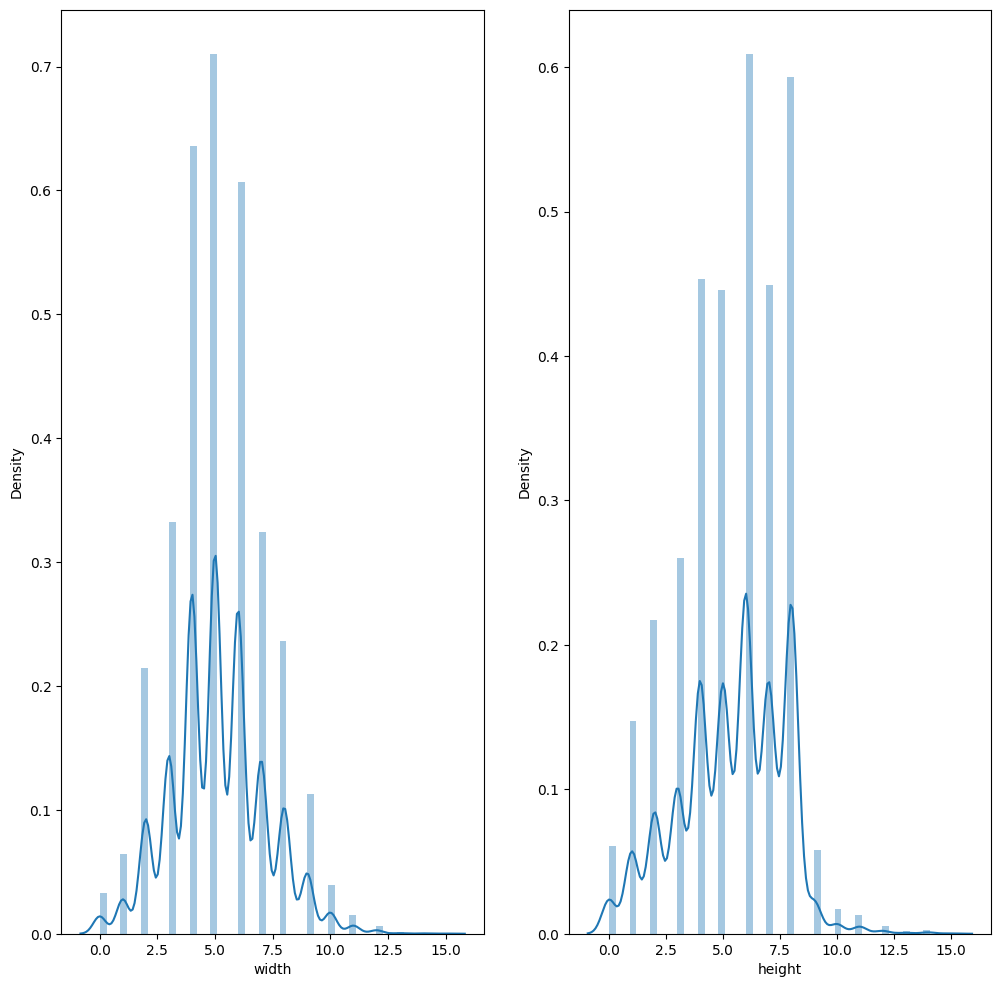

<ipython-input-53-00d6cd99ac9d>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['width'])
<ipython-input-53-00d6cd99ac9d>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)
<ipython-input-53-00d6cd99ac9d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use t

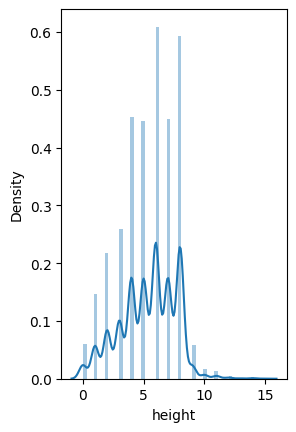

<ipython-input-53-00d6cd99ac9d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['width'])
<ipython-input-53-00d6cd99ac9d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['height'])


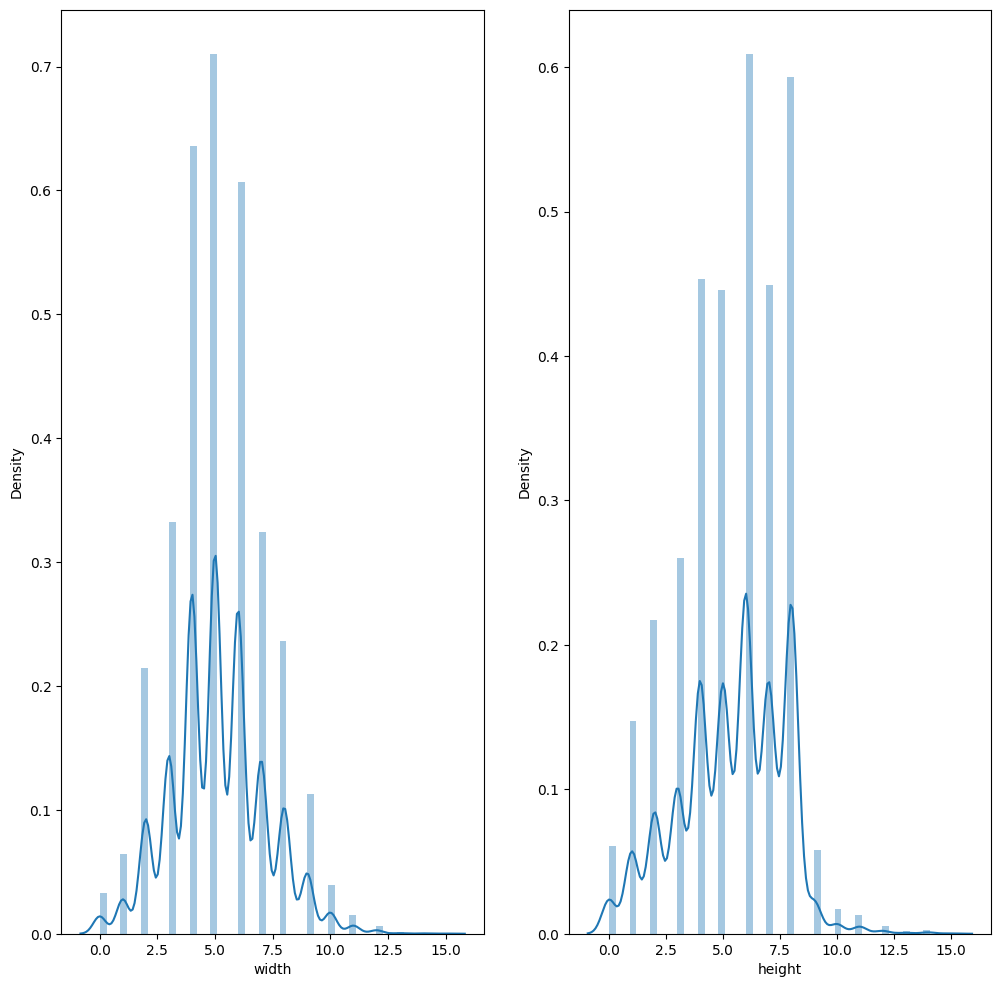

<ipython-input-53-00d6cd99ac9d>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['width'])
<ipython-input-53-00d6cd99ac9d>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)
<ipython-input-53-00d6cd99ac9d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use t

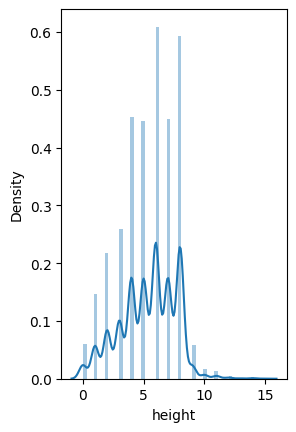

In [53]:
for i in range (10):
  plt.figure(figsize=(12,12))
  plt.subplot(1,2,1)
  sns.distplot(df['width'])
  plt.subplot(1,2,2)
  sns.distplot(df['height'])
  plt.show()



  sns.distplot(df['width'])
  plt.subplot(1,2,2)
  sns.distplot(df['height'])
  plt.show()



In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV


In [55]:
# 2. Model Implementation
def create_model(hidden_layers=1, neurons=32, activation='relu', learning_rate=0.001):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(x_train.shape[1],)))
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation=activation))
    # The output layer should be added only once, outside the loop
    model.add(Dense(26, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [56]:
# Create and train the initial model
initial_model = create_model()
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=26)  # If y_train is not already one-hot encoded
y_test = to_categorical(y_test, num_classes=26)
y_test

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [57]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [58]:
# Create and train the model
initial_model=create_model()
initial_model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))
initial_model.summary()

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2296 - loss: 2.7907 - val_accuracy: 0.5955 - val_loss: 1.5821
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6265 - loss: 1.4305 - val_accuracy: 0.7205 - val_loss: 1.0857
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7241 - loss: 1.0275 - val_accuracy: 0.7685 - val_loss: 0.8866
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7626 - loss: 0.8665 - val_accuracy: 0.7933 - val_loss: 0.7758
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7870 - loss: 0.7664 - val_accuracy: 0.8173 - val_loss: 0.7050
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8067 - loss: 0.6943 - val_accuracy: 0.8280 - val_loss: 0.6520
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8240 - loss: 0.6321 - val_accuracy: 0.8338 - val_loss: 0.6121
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8284 - loss: 0.5942 - val_accuracy: 0.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 26)                  │             858 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,208 (16.44 KB)

 Trainable params: 1,402 (5.48 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,806 (10.96 KB)

In [62]:
!pip install scikeras
from scikeras.wrappers import KerasClassifier  # Import KerasClassifier from SciKeras

In [70]:
# Train accuracy
train_accuracy = initial_model.evaluate(x_train, y_train)[1]
print(f"Train Accuracy: {train_accuracy}")


500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8462 - loss: 0.5246
Train Accuracy: 0.8503124713897705


In [73]:
test_accuracy = initial_model.evaluate(x_test, y_test)[1] # Calculate and assign test accuracy
print(f"Test Accuracy: {test_accuracy}")


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8481 - loss: 0.5235
Test Accuracy: 0.8497499823570251


In [74]:
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Train Accuracy: 0.8503124713897705
Test Accuracy: 0.8497499823570251


NameError: name 'precision' is not defined

In [76]:
from sklearn.metrics import precision_score, recall_score, f1_score
y_pred = initial_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [77]:
y_pred_binary = (y_pred > 0.5).astype(int)
y_pred_binary

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [80]:
# Calculate the metrics
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1= f1_score(y_test_classes, y_pred_classes, average='weighted')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Precision: 0.8524908527829413
Recall: 0.84975
F1 Score: 0.8493942679559527


In [81]:
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Train Accuracy: 0.8503124713897705
Test Accuracy: 0.8497499823570251
Precision: 0.8524908527829413
Recall: 0.84975
F1 Score: 0.8493942679559527


In [82]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_classes,y_pred_classes))


              precision    recall  f1-score   support

           0       0.90      0.93      0.91       149
           1       0.78      0.90      0.84       153
           2       0.90      0.83      0.86       137
           3       0.78      0.90      0.84       156
           4       0.84      0.87      0.85       141
           5       0.79      0.76      0.77       140
           6       0.76      0.76      0.76       160
           7       0.85      0.65      0.73       144
           8       0.90      0.79      0.84       146
           9       0.89      0.84      0.86       149
          10       0.79      0.76      0.77       130
          11       0.88      0.89      0.89       155
          12       0.86      0.93      0.89       168
          13       0.91      0.89      0.90       151
          14       0.83      0.82      0.82       145
          15       0.94      0.86      0.90       173
          16       0.86      0.88      0.87       166
          17       0.73    

In [83]:
confusion_matrix(y_test_classes,y_pred_classes)


array([[138,   1,   0,   0,   0,   0,   0,   1,   0,   1,   1,   0,   3,
          0,   0,   0,   0,   1,   1,   0,   1,   0,   0,   0,   1,   0],
       [  0, 137,   0,   5,   0,   0,   2,   1,   0,   0,   0,   0,   0,
          0,   0,   1,   0,   6,   0,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0, 114,   0,   0,   1,   3,   0,   0,   0,   6,   2,   0,
          0,   5,   0,   0,   0,   3,   0,   2,   1,   0,   0,   0,   0],
       [  1,   5,   0, 141,   0,   1,   0,   0,   0,   0,   0,   0,   3,
          0,   1,   0,   0,   0,   0,   2,   0,   0,   0,   2,   0,   0],
       [  0,   1,   0,   0, 123,   0,   5,   0,   0,   0,   2,   3,   0,
          0,   0,   0,   1,   1,   3,   1,   0,   0,   0,   1,   0,   0],
       [  0,   3,   1,   0,   5, 106,   4,   4,   2,   0,   0,   0,   0,
          0,   0,   1,   0,   1,   1,  11,   0,   0,   0,   0,   0,   1],
       [  0,   3,   8,   2,   0,   1, 122,   1,   0,   0,   4,   2,   0,
          0,   1,   0,   6,   2,   2,   0,   

In [84]:
# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test_classes, y_pred_classes), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [86]:
print(classification_report(y_test_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       149
           1       0.78      0.90      0.84       153
           2       0.90      0.83      0.86       137
           3       0.78      0.90      0.84       156
           4       0.84      0.87      0.85       141
           5       0.79      0.76      0.77       140
           6       0.76      0.76      0.76       160
           7       0.85      0.65      0.73       144
           8       0.90      0.79      0.84       146
           9       0.89      0.84      0.86       149
          10       0.79      0.76      0.77       130
          11       0.88      0.89      0.89       155
          12       0.86      0.93      0.89       168
          13       0.91      0.89      0.90       151
          14       0.83      0.82      0.82       145
          15       0.94      0.86      0.90       173
          16       0.86      0.88      0.87       166
          17       0.73    

In [87]:
# Define the keras model
def create_model(hidden_layers=1, neurons=32, activation='relu', learning_rate=0.001):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(x_train.shape[1],)))
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation=activation))
        # The output layer should be added only once, outside the loop
    model.add(Dense(26, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [90]:
# Hyperparameter tuning
from scikeras.wrappers import KerasClassifier
model=KerasClassifier(model=create_model,loss='categorical_crossentropy',metrics=['accuracy'])
model.get_params()



{'model': <function __main__.create_model(hidden_layers=1, neurons=32, activation='relu', learning_rate=0.001)>,
 'build_fn': None,
 'warm_start': False,
 'random_state': None,
 'optimizer': 'rmsprop',
 'loss': 'categorical_crossentropy',
 'metrics': ['accuracy'],
 'batch_size': None,
 'validation_batch_size': None,
 'verbose': 1,
 'callbacks': None,
 'validation_split': 0.0,
 'shuffle': True,
 'run_eagerly': False,
 'epochs': 1,
 'class_weight': None}

In [91]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2279 - loss: 2.8037


KerasClassifier(
	model=<function create_model at 0x7b0855967880>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=categorical_crossentropy
	metrics=['accuracy']
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [92]:
x_train.shape

(16000, 16)

In [93]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2275 - loss: 2.7531 - val_accuracy: 0.6143 - val_loss: 1.4996
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6512 - loss: 1.3473 - val_accuracy: 0.7132 - val_loss: 1.0570
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7165 - loss: 1.0310 - val_accuracy: 0.7588 - val_loss: 0.8878
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7565 - loss: 0.8786 - val_accuracy: 0.7883 - val_loss: 0.7969
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7818 - loss: 0.7860 - val_accuracy: 0.7993 - val_loss: 0.7337
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8030 - loss: 0.7151 - val_accuracy: 0.8152 - val_loss: 0.6824
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8149 - loss: 0.6796 - val_accuracy: 0.8242 - val_loss: 0.6451
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8188 - loss: 0.6473 - val_accuracy: 0.8363 - val_

KerasClassifier(
	model=<function create_model at 0x7b0855967880>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=categorical_crossentropy
	metrics=['accuracy']
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [94]:
# 4. Evaluation
train_accuracy = model.score(x_train, y_train)
test_accuracy = model.score(x_test, y_test)
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(classification_report(y_test_classes, y_pred_classes))
print(confusion_matrix(y_test_classes, y_pred_classes))
print(classification_report(y_test_classes, y_pred_classes))

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Train Accuracy: 0.8410625
Test Accuracy: 0.84175
Precision: 0.8524908527829413
Recall: 0.84975
F1 Score: 0.8493942679559527
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       149
           1       0.78      0.90      0.84       153
           2       0.90      0.83      0.86       137
           3       0.78      0.90      0.84       156
           4       0.84      0.87      0.85       141
           5       0.79      0.76      0.77       140
           6       0.76      0.76      0.76       160
           7       0.85      0.65      0.73       144
           8       0.90      0.79      0.84       146
           9       0.89      0.84      0.86       149
          10       0.79      0.76      0.77       130
          11       0.88      0.89      0.89       155
          12       0.86      0.93      0.89       168
          13       0.91      0.89    

In [98]:
import tensorflow as tf # Import tensorflow

optimizer = [
    tf.keras.optimizers.Adam(),  # Use tf.keras.optimizers
    tf.keras.optimizers.SGD(),   # Use tf.keras.optimizers
    tf.keras.optimizers.RMSprop() # Use tf.keras.optimizers
]
param_grid = {
    'optimizer': optimizer,
    'loss': ['categorical_crossentropy', 'binary_crossentropy'],
    'metrics': [['accuracy']]
}
print(param_grid)

{'optimizer': [<keras.src.optimizers.adam.Adam object at 0x7b08541db070>, <keras.src.optimizers.sgd.SGD object at 0x7b08541da770>, <keras.src.optimizers.rmsprop.RMSprop object at 0x7b084f60feb0>], 'loss': ['categorical_crossentropy', 'binary_crossentropy'], 'metrics': [['accuracy']]}


In [100]:
#Import the GridSearchCV from sklearn.model_selection
from sklearn.model_selection import GridSearchCV

#The rest of the cell should work as intended
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


334/334 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1720 - loss: 2.9319
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1348 - loss: 3.0569
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1778 - loss: 2.9646
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1670 - loss: 2.9662
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1322 - loss: 3.0683
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1841 - loss: 2.9353
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1547 - loss: 3.0959
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1657 - loss: 2.9781
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


334/334 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1729 - loss: 2.9497
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2250 - loss: 2.8057


GridSearchCV(cv=3,
             estimator=KerasClassifier(loss='categorical_crossentropy', metrics=['accuracy'], model=<function create_model at 0x7b0855967880>),
             param_grid={'loss': ['categorical_crossentropy',
                                  'binary_crossentropy'],
                         'metrics': [['accuracy']],
                         'optimizer': [<keras.src.optimizers.adam.Adam object at 0x7b08541db070>,
                                       <keras.src.optimizers.sgd.SGD object at 0x7b08541da770>,
                                       <keras.src.optimizers.rmsprop.RMSprop object at 0x7b084f60feb0>]})

In [101]:
print(grid_search.best_params_)

{'loss': 'categorical_crossentropy', 'metrics': ['accuracy'], 'optimizer': <keras.src.optimizers.adam.Adam object at 0x7b08541db070>}
